In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("car_price_train-data.csv")
train = train.drop('Unnamed: 0', axis = 1)
tmp_train = train.copy()
tmp_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


### Mileage(연비), Engine, Power, New_Price의 단위를 통일&제거 하여 실수 타입의 수치형 변수로 만들어준다.

In [4]:
train['Mileage'] = tmp_train["Mileage"].str.extract('([0-9]+\.[0-9]+)')
train['Mileage'] = train['Mileage'].astype(float)

train['Engine'] = tmp_train["Engine"].str.extract('([0-9]+)')
train['Engine'] = train['Engine'].astype(float)

train['Power'] = tmp_train["Power"].str.extract('([0-9]+\.[0-9]+)')
train['Power'] = train['Power'].astype(float)


def get_New_Price(x):
    x = str(x)
    if x == 'nan' : return np.nan
    x_list = x.split()
    if x_list[1] == "Lakh" : return float(x_list[0])
    return float(x_list[0]) * 100

train['New_Price'] = tmp_train.New_Price.map(lambda x : get_New_Price(x))

In [5]:
train.info()
train_sample = train.iloc[[148], :]
train_sample.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              3693 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,NaN,4.0,128.0,37.0


# NAME

In [6]:
train['Brand'] = tmp_train.Name.map(lambda x : x.split()[0])
train['Model'] = tmp_train.Name.map(lambda x :" ".join(x.split()[1:]))

print('서로 다른 Name 개수 : ', train['Name'].nunique())
print('서로 다른 Brand 개수 : ', train['Brand'].nunique())
print('서로 다른 Model 개수 : ', train['Model'].nunique())

서로 다른 Name 개수 :  1876
서로 다른 Brand 개수 :  31
서로 다른 Model 개수 :  1876


In [7]:
train.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
435,BMW 5 Series 2003-2012 GT 530d LE,Coimbatore,2011,57832,Diesel,Automatic,First,16.20,2993.0,NaN,5.0,NaN,25.82,BMW,5 Series 2003-2012 GT 530d LE
1145,Mahindra XUV500 W8 4WD,Coimbatore,2013,116694,Diesel,Manual,First,15.10,2179.0,NaN,7.0,NaN,9.57,Mahindra,XUV500 W8 4WD
3715,Mahindra Quanto C8,Kochi,2014,58816,Diesel,Manual,First,17.21,1493.0,NaN,7.0,NaN,3.45,Mahindra,Quanto C8
1630,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Mumbai,2018,2500,Petrol,Manual,First,15.29,1591.0,121.30,5.0,NaN,12.75,Hyundai,Creta 1.6 SX Plus Dual Tone Petrol
22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53,1984.0,177.01,5.0,NaN,23.50,Audi,A6 2011-2015 35 TFSI Technology
1817,Hyundai Verna 1.6 CRDi SX,Kolkata,2017,25000,Diesel,Manual,First,23.90,1582.0,126.20,5.0,NaN,8.65,Hyundai,Verna 1.6 CRDi SX
4041,Ford Ecosport 1.5 Ti VCT MT Titanium,Mumbai,2017,27000,Petrol,Manual,First,15.80,1499.0,NaN,5.0,NaN,8.30,Ford,Ecosport 1.5 Ti VCT MT Titanium
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.50,1197.0,NaN,5.0,NaN,2.50,Hyundai,i20 1.2 Magna
878,Renault KWID 1.0 RXT Optional,Jaipur,2017,63262,Petrol,Manual,First,21.70,999.0,NaN,5.0,4.78,3.25,Renault,KWID 1.0 RXT Optional
3958,Hyundai i10 Magna AT,Coimbatore,2011,50058,Petrol,Automatic,First,19.20,1197.0,NaN,5.0,NaN,3.84,Hyundai,i10 Magna AT


* 범주형 변수 & 수치형 변수 
-> 결측치 제거

* 로그변환 (vs 표준화(StandardScaler) vs 정규화(MinMaxScaler))

* get_dummeis
 : 원핫인코딩 (범주형)
* concat
 : 범주형 , 수치형 합치기
* x, y로 분리 (sklearn)

## seat

In [8]:
print('Seats별 매물개수: \n', train['Seats'].value_counts())
print('Seats의 결측치 개수: ', train['Seats'].isnull().sum())

Seats별 매물개수: 
 5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64
Seats의 결측치 개수:  42


In [9]:
train.loc[tmp_train['Seats'] == 0, 'Seats'] = 5
train.loc[tmp_train['Seats'].isnull(), 'Seats'] = 5
print('Seats의 결측치 개수: ', train['Seats'].isnull().sum())

Seats의 결측치 개수:  0


# 수치형 변수
## Mileage
* Mileage 값이 0인 data도 결측치로 편입시킴

In [10]:
train.loc[train['Mileage'] == 0, 'Mileage'] = np.nan
print('Mileage 결측치 개수: ', train['Mileage'].isnull().sum())
print('Engine 결측치 개수: ', train['Engine'].isnull().sum())
print('Power 결측치 개수: ', train['Power'].isnull().sum())

Mileage 결측치 개수:  70
Engine 결측치 개수:  36
Power 결측치 개수:  2326


* 속성들의 Brand 그룹별 평균을 list로 만든 뒤, 결측치를 가진 튜플이 해당하는 Brand의 해당 값을 결측치에 넣어준다.

In [11]:
Brand_list = train.groupby('Brand').mean().index.tolist()
Mileage_mean_list = train.groupby('Brand').mean()['Mileage'].values.tolist()
Engine_mean_list = train.groupby('Brand').mean()['Engine'].values.tolist()
Power_mean_list = train.groupby('Brand').mean()['Power'].values.tolist()
New_Price_mean_list = train.groupby('Brand').mean()['New_Price'].values.tolist()


def set_Brand_mean_to_Mileage(x):
    if str(x['Mileage']) != 'nan': return x['Mileage']
    brand_idx = Brand_list.index(x['Brand'])
    Mileage_val = Mileage_mean_list[brand_idx]
    return Mileage_val

train['Mileage'] = train.apply(lambda x : set_Brand_mean_to_Mileage(x), axis=1)

def set_Brand_mean_to_Engine(x):
    if str(x['Engine']) != 'nan': return x['Engine']
    brand_idx = Brand_list.index(x['Brand'])
    Engine_val = Engine_mean_list[brand_idx]
    return Engine_val

train['Engine'] = train.apply(lambda x : set_Brand_mean_to_Engine(x), axis=1)

def set_Brand_mean_to_Power(x):
    if str(x['Power']) != 'nan': return x['Power']
    brand_idx = Brand_list.index(x['Brand'])
    Power_val = Power_mean_list[brand_idx]
    return Power_val

train['Power'] = train.apply(lambda x : set_Brand_mean_to_Power(x), axis=1)

def set_Brand_mean_to_New_Price(x):
    if str(x['New_Price']) != 'nan': return x['New_Price']
    brand_idx = Brand_list.index(x['Brand'])
    New_Price_val = New_Price_mean_list[brand_idx]
    return New_Price_val

train['New_Price'] = train.apply(lambda x : set_Brand_mean_to_New_Price(x), axis=1)

In [12]:
print('Mileage 결측치 개수: ', train['Mileage'].isnull().sum())
print('Engine 결측치 개수: ', train['Engine'].isnull().sum())
print('Power 결측치 개수: ', train['Power'].isnull().sum())
print('New_Price 결측치 개수: ', train['New_Price'].isnull().sum())

Mileage 결측치 개수:  1
Engine 결측치 개수:  0
Power 결측치 개수:  41
New_Price 결측치 개수:  130


* 같은 브랜드가 가진 다른 튜플의 속성 값이 없을 경우, 전체 평균을 결측치에 넣어준다.

In [13]:
train.loc[train['Mileage'].isnull(), 'Mileage'] = train.mean()['Mileage']
train.loc[train['Power'].isnull(), 'Power'] = train.mean()['Power']
train.loc[train['New_Price'].isnull(), 'New_Price'] = train.mean()['New_Price']

print('Mileage 결측치 개수: ', train['Mileage'].isnull().sum())
print('Power 결측치 개수: ', train['Power'].isnull().sum())
print('New_Price 결측치 개수: ', train['New_Price'].isnull().sum())

Mileage 결측치 개수:  0
Power 결측치 개수:  0
New_Price 결측치 개수:  0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  Brand              6019 non-null   object 
 14  Model              6019 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 705.5+ KB


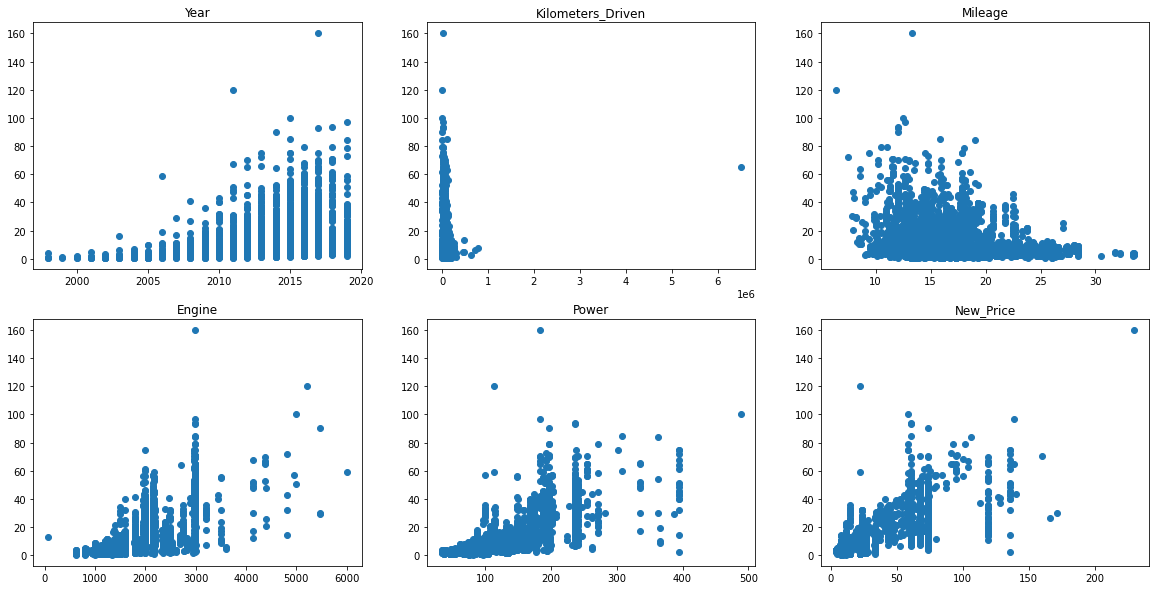

In [15]:
import matplotlib.pyplot as plt

cat_cols = ['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
train_cat = train[cat_cols]

num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']
train_num = train[num_cols]


plt.figure(figsize=(20,10))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.scatter(train_num.iloc[:,i], train_num['Price'])
    plt.title(train_num.columns[i])

In [16]:
train[train['Kilometers_Driven']>6000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,236.35,5.0,60.63614,65.0,BMW,X5 xDrive 30d M Sport


In [17]:
train.drop(2328, inplace= True)
train[train['Kilometers_Driven']>6000000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model


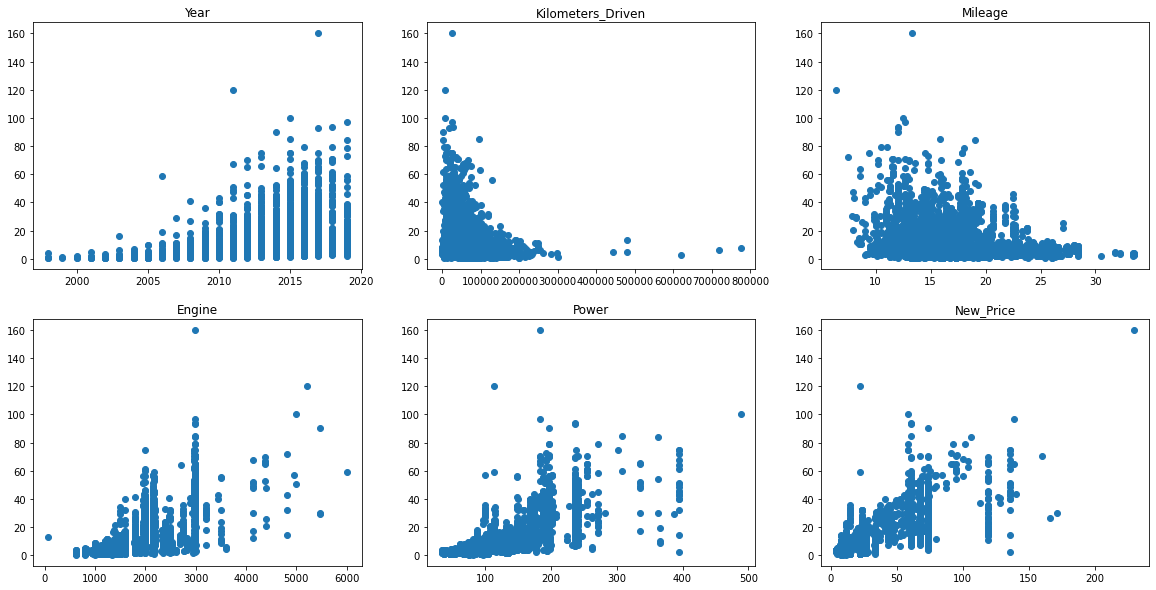

In [18]:
cat_cols = ['Brand', 'Location', 'Year', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']
train_cat = train[cat_cols]

num_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_Price', 'Price']
train_num = train[num_cols]

plt.figure(figsize=(20,10))
for i in range(0,6):
    plt.subplot(2,3,i+1)
    plt.scatter(train_num.iloc[:,i], train_num['Price'])
    plt.title(train_num.columns[i])


In [19]:
train_num= train_num.apply(lambda x : np.log(x))
train_num

,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price,Price
0,7.605890,11.184421,3.280911,6.905753,4.063198,2.079847,0.559616
1,7.608374,10.621327,2.979095,7.366445,4.837868,2.453149,2.525729
2,7.606387,10.736397,2.901422,7.089243,4.485260,2.152924,1.504077
3,7.606885,11.373663,3.033510,7.129298,4.485936,2.079847,1.791759
4,7.607381,10.613246,2.721295,7.584773,4.947340,4.215092,2.875822
...,...,...,...,...,...,...,...
6014,7.607878,10.217020,3.346389,7.129298,4.323644,2.064328,1.558145
6015,7.608374,11.512925,3.194583,7.021084,4.564767,2.453149,1.386294
6016,7.606885,10.915088,2.639057,7.823246,4.467440,2.436612,1.064711
6017,7.607381,10.736397,2.939162,6.905753,4.206184,2.079847,0.974560


In [20]:
train_cat

,Brand,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats
0,Maruti,Mumbai,2010,CNG,Manual,First,5.0
1,Hyundai,Pune,2015,Diesel,Manual,First,5.0
2,Honda,Chennai,2011,Petrol,Manual,First,5.0
3,Maruti,Chennai,2012,Diesel,Manual,First,7.0
4,Audi,Coimbatore,2013,Diesel,Automatic,Second,5.0
...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,Diesel,Manual,First,5.0
6015,Hyundai,Jaipur,2015,Diesel,Manual,First,5.0
6016,Mahindra,Jaipur,2012,Diesel,Manual,Second,8.0
6017,Maruti,Kolkata,2013,Petrol,Manual,First,5.0


In [21]:
train_cat = train_cat.astype(str)
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         6018 non-null   object
 1   Location      6018 non-null   object
 2   Year          6018 non-null   object
 3   Fuel_Type     6018 non-null   object
 4   Transmission  6018 non-null   object
 5   Owner_Type    6018 non-null   object
 6   Seats         6018 non-null   object
dtypes: object(7)
memory usage: 376.1+ KB


In [22]:
train_cat = pd.get_dummies(train_cat, prefix=cat_cols)

In [23]:
train = pd.concat([train_cat, train_num], axis=1)

In [24]:
data = train.iloc[:, :-1]
target = train.iloc[:, -1]

## ==============================================================

In [36]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
target, test_size = 0.2, shuffle = True, random_state = 34)
#훈련 세트(train_input,train_target)와 테스트 세트(test_input, test_target)로 나눈다.
#train_test_split함수의 여러 옵션 값들을 잘 확인해서 사용한다.

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 34)

#중고차 가격 예측과 같이, 회귀 모델에서는 분류 모델인 DecisionTreeClassifier가 아닌
#회귀 모델인 DecisionTreeRegressor를 사용해야 한다.

dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
#높은 점수가 나왔지만, 테스트 세트와 차이가 크므로 과대적합이다. 이후에 교차검증을 시도해본다.

0.999993149338792
0.8987533037919507


In [27]:
train_input

,Brand_Ambassador,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,...,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Year,Kilometers_Driven,Mileage,Engine,Power,New_Price
3312,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,7.608374,11.314475,2.772589,7.686621,4.467440,2.436612
4035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.605890,11.156251,2.944439,6.905753,4.191169,2.079847
604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.608871,10.126631,3.068053,7.311886,4.686750,2.763800
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.607381,10.741384,2.986187,6.990257,4.220243,2.453149
4579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.607878,11.512925,2.653946,7.669962,5.282630,4.300184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.606885,11.775290,2.977568,7.286876,4.686289,2.041413
5994,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.605392,11.002100,2.833213,7.311218,4.648186,2.457979
2539,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.607878,11.170435,3.222868,7.311886,4.591071,2.457979
5243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7.605890,11.034890,3.013572,7.087574,4.368181,2.453149


In [28]:
dt_f_i = (dt.feature_importances_)
dt_f_i[83:90] #Year~New_price
print("특성 중요도: Year, Kilometers_Driven, Mileage, Engine, Power, New_Price")
print("특성 중요도: ", dt_f_i[83:90])

특성 중요도: Year, Kilometers_Driven, Mileage, Engine, Power, New_Price
특성 중요도:  [0.22186042 0.01431341 0.01445565 0.13736743 0.51418665 0.03783751]


In [29]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(np.mean(scores['test_score']))
#5-폴드 교차 검증을 해서 교차 검증을 5회 시도한다.
#다시 말해, 결정트리회귀를 다른 세트들로 총 5회 했을 때 정확도를 뜻한다.

0.8780421659174685


In [30]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_jobs = -1, random_state = 34)
forest.fit(train_input, train_target)

print(forest.score(train_input, train_target))
print(forest.score(test_input, test_target))
#DecisionTreeRegressor보다 테스트 세트에 대한 정확도가 높음. 즉, 일반화가 더 잘됨.
#DecisionTreeRegressor를 100회(기본값) 수행해서, 각 트리의 예측을 평균한다.
#DecisionTreeRegressor는 특성(feature)가 많을 때, 오버피팅이 되기 쉽다. 이번 데이터 세트는 특성이 많아서
#오버피팅 된 것이다.

#이를 해결하기 위해 이를 해결하기 위해 RandomForestRegressor를 활용해서
#Feature의 개수를 추려 작은 결정트리를 여러개로 만들어 하나로 합치는 과정을 거쳐서 더 일반적인 예측을 한다,

0.9911032662018787
0.9512260774841852


In [31]:
f_f_i = forest.feature_importances_
f_f_i[83:90] #Year~New_price
#위에서 봤던 DecisionTreeRegressor는 Power의 중요도가 0.5가 넘어섰다. 중요도가 다소 치우친 것이다.
#그러나 RandomForestRegressor는 Power의 중요도가 0.147로,
#그리고 나머지 중요도가 낮았던 특성들의 중요도가 다시 상승했다.
#이는 랜덤 포레스트가 특성의 일부를 랜덤하게 선택하여 결정 트리를 훈련하기 때문이다.
#그 결과 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다.
#이는 과대적합을 줄이고 일반화 성능을 높이는 데 도움이 된다.

array([0.22074151, 0.01737459, 0.01609983, 0.1473653 , 0.27597517,
       0.26893453])

In [32]:
from sklearn.model_selection import cross_validate
import numpy as np
scores = cross_validate(forest, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
#랜덤포레스트의 교차 검증을 수행하면, 테스트 세트로 검증할 때보다 예측도가 약간은 떨어졌지만,
#그래도 DecisionTreeRegressor보다 더 일반화됐다고 볼 수 있다.

0.9908856208199041 0.9368537449318787


In [33]:
import numpy as np
print(np.mean(scores['test_score']))

0.9368537449318787


In [28]:
sub_input = sub_input.astype(int)
sub_target = sub_target.astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)
forest.fit(train_input, train_target)
    
y_pred = forest.predict(test_input)
print('정확도 :', metrics.accuracy_score(test_target, y_pred))

정확도 : 0.7948504983388704


In [29]:
sub_input = sub_input.astype(int)
sub_target = sub_target.astype(int)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

forest = RandomForestClassifier(n_estimators=100)
forest.fit(sub_input, sub_target)
    
y_pred = forest.predict(val_input)
print('정확도 :', metrics.accuracy_score(val_target, y_pred))

정확도 : 0.77466251298027


In [30]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(sub_input, sub_target)
print(knr.score(sub_input, sub_target))

0.8724502366378474


In [31]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(val_input, val_target)
print(knr.score(val_input, val_target))

0.8542853704540543


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 34)

#DecisionTreeClassifier는 정수형만 사용할 수 있다.

dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(train_input, train_target))

0.9716956634640354
0.9289572081429165


In [33]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.02399826, 0.02299976, 0.02300286, 0.02299976, 0.02399588]), 'score_time': array([0.00200009, 0.00200033, 0.00300097, 0.00200033, 0.0030036 ]), 'test_score': array([0.73312565, 0.73520249, 0.7403946 , 0.7549325 , 0.75259875])}


C:\Users\kjsjh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
import numpy as np
print(np.mean(scores['test_score']))

0.7432507993255657
